In [ ]:
import serial
import serial.tools.list_ports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
from PyQt5 import QtCore, QtGui, QtWidgets
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.animation import FuncAnimation
from scipy import interpolate
import scipy.interpolate as interpolate



baud_rate = 115200
mask_header = b'\xfa'
mask_tail = b'\xfe\xfe'
mask_serial_number = bytes(b'\x80\x00')
zero_point = 0.5
span = 2
def int_from_bytes(xbytes: bytes) -> int:
    temp = bytearray(xbytes)
    temp.reverse()
    temp = int.from_bytes(temp, byteorder="big", signed=False)
    return temp
def bitwise_and_bytes(a, b):
    result_int = int.from_bytes(a, byteorder="big") & int.from_bytes(b, byteorder="big") 
    return result_int.to_bytes(max(len(a), len(b)), byteorder="big")
def open_serial_port(port_number, baud_rate):
    serial_port = serial.Serial(port_number, baud_rate)
    print(serial_port)
    return serial_port
ports = list(serial.tools.list_ports.comports())
ports = sorted(ports)
serial_port = None
for p in ports:
    # find serial ports
    if "Serial Port" in p[1]: # [1] returns description of a port
        serial_port = p
        break
port_number = serial_port[0]
try:
    opened_serial_port = open_serial_port(port_number, baud_rate)     
except:
    opened_serial_port = None
    opened_serial_port = open_serial_port(port_number, baud_rate) 
    print (opened_serial_port) 
buffers = []
byte = opened_serial_port.read(1) 
print (byte)   
while byte:
    buffer = []
    if byte == mask_header:
        temp_header = byte
        byte = opened_serial_port.read(1)
        if byte == mask_header:
            header = temp_header + byte
            buffer.append(int_from_bytes(header))
            byte = opened_serial_port.read(2) 
            while byte:
                if byte != mask_tail:
                    temp = int_from_bytes(byte)
                    buffer.append(temp)
                    if len(
                        buffer) == 2:
                        b_array = bytearray(byte)
                        b_array.reverse()
                        temp_bitwise_and = bitwise_and_bytes(b_array, mask_serial_number)
                        buffer[-1] = int_from_bytes(temp_bitwise_and)
                    byte = opened_serial_port.read(2)   
                else:
                    tail = int_from_bytes(byte)
                    buffer.append(tail)
                    mat = np.array(buffer)[2:2050]
                    mat = mat.reshape(64, 32)
                    buffers.append(mat)
                    
                    

# Calculate the calibration coefficients
                    gain = span / (mat.max() - mat.min())
                    offset = zero_point - gain * mat.min()

# Calculate the calibrated data
                    calibrated_output = gain * mat + offset
                   
                    time.sleep(0.2)
                    fig, ax = plt.subplots()
                    ax.imshow(calibrated_output[:11, :11], extent=[0, 10, 0, 10], cmap='hot')
                    ax.set_xlabel('X-axis')
                    ax.set_ylabel('Y-axis')
                    plt.show()
                    plt.pause(0.2)
                    plt.close()
                    plt.interactive(True)

                                   
    byte = opened_serial_port.read(1)
    
   
    
    
    


In [12]:
#echo "# Real-Time-Pressure-Sensor-data-through-Serial-Port" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/AhsanAziz37406/Real-Time-Pressure-Sensor-data-through-Serial-Port.git
git push -u origin main

SyntaxError: invalid syntax (1126492394.py, line 1)

In [ ]:
 num_reference_measurements = 10
                    reference_measurements = np.zeros(num_reference_measurements)
                    current_index = 0

                    while True:
    # Get the latest sensor reading
                        current_measurement = np.random.randn()

    # Update the reference measurements
                        reference_measurements[current_index % num_reference_measurements] = current_measurement
                        current_index += 1

    # Check if we have enough reference measurements
                        if current_index >= num_reference_measurements:
        # Use the reference measurements to calibrate the sensor data
                            x = np.arange(num_reference_measurements)
                            spline = interpolate.UnivariateSpline(x, reference_measurements, s=0.5)
                            smooth_data = spline(np.linspace(0, num_reference_measurements-1, num=num_reference_measurements*10))

                    





#                   x = np.arange(len(mat))
#                    spline = interpolate.UnivariateSpline(x, mat, s=0.5)
 #                   smooth_data = spline(np.linspace(0, len(mat)-1, num=len(mat)*10))
                    
                    
 Calibration factor
#                    calibration_factor = 1.0

# Reference measurements
 #                   reference_measurements = []

# Sensor readings
                    

# Number of reference measurements to use for calibration
  #                  num_reference_measurements = 10

# Running flag to indicate if calibration is in progress
   #                 calibration_in_progress = True

    #                while True:
    # Get real-time data from the sensor
    
    
     #                   if calibration_in_progress:
       #                     reference_measurements.append(mat)
      #                      if len(reference_measurements) == num_reference_measurements:
        #                        reference_mean = np.mean(reference_measurements)
         #                       calibration_factor = reference_mean / np.mean(reference_measurements)
          #                      calibration_in_progress = False
           #             else:
        # Apply the calibration factor to the sensor data
            #                calibrated_data = mat * calibration_factor
                            

In [ ]:

    ##
    ##plt.figure()
    # plt.imshow(mat[:11, :11].T, extent=[0, 10, 0, 10], cmap='hot')
    # plt.title("Pressure Sensor Matrix")
    # plt.xlabel("X-axis")
    # plt.ylabel("Y-axis")
    # plt.show()
    # plt.clf()
    
    
    #fig = Figure()
    #canvas = FigureCanvas(fig)
    #ax = fig.add_subplot(111)


    #mat = byte() # function that returns new data
    #ax.clear()
    #ax.imshow(buffer[:11, :11].T, extent=[0, 10, 0, 10], cmap='hot')
    #ax.set_title("Pressure Sensor Matrix")
    #ax.set_xlabel("X-axis")
    #ax.set_ylabel("Y-axis")
    #canvas.draw()
    #time.sleep(1)
    
    #    fig, ax = plt.subplots()
    # if len(buffers) > 0:
    #     img = ax.imshow(buffers[-1]) # display the last heat map in the buffer

    # def update(i):
    #     ax.clear()
    #  #   img = ax.imshow(buffers[i]) # display the new heat map
    # # def update(i):
    #     img.set_data(buffers[i]) # update the data on the existing plot with the new heat map

    #     ani = FuncAnimation(fig, update, frames=range(len(buffers)), interval=1000)
    #     plt.show()
    #     ani.save()
    
    # .................it was to show the heat map on the seperate window and replace the old window
    # class MainWindow(QtWidgets.QMainWindow):
    #     def __init__(self):
    #         super().__init__()

    #         self.label = QtWidgets.QLabel(self)
    #         self.setCentralWidget(self.label)
    #         self.figure = Figure()
    #         self.canvas = FigureCanvas(self.figure)
    #         self.label.setPixmap(self.canvas.grab())
          
    #     def update_heatmap(self, mat):
    #         self.figure.clear()
    #         self.axes = self.figure.add_subplot(111)
    #         self.axes.imshow(mat, cmap='hot')
    #         self.canvas.draw()
    #         self.label.setPixmap(self.canvas.grab())
    #         if __name__ == '__main__':
    #             app = QtWidgets.QApplication([])
    #             window = MainWindow()
    #             window.show()

    #             timer = QtCore.QTimer()
    #             timer.timeout.connect(lambda: window.update_heatmap(mat))
    #             timer.start(1000)  # update heat map every 1 second

    #             app.exec_()
    
    

    #print(buffer)
    # Reshape the input array to have a shape of (976, 1)
    #mat = mat.reshape(-1, 1)

    # Now you can use input_array as an index for a 2-dimensional array
    #output_array = some_2d_array[mat]
    
    # sns.heatmap(mat, cmap='hot')
    # plt.title("Pressure Sensor Matrix")
    # plt.xlabel("X-axis")
    # plt.ylabel("Y-axis")
    # plt.imshow(mat, cmap='hot')
    # plt.show()
    
    # buffers = []
    # while byte:
    # # code to read and process data
    #     mat = np.array(buffer)[2:2050]
    #     mat = mat.reshape(64, 32)
    #     buffers[0:1] = [mat] # replace the first element of list with new heat map
    #     buffers = buffers[:1] # keep only the first element of list
    #     sns.heatmap(buffers[0], cmap='hot')
    #     plt.title("Pressure Sensor Matrix")
    #     plt.xlabel("X-axis")
    #     plt.ylabel("Y-axis")
    #     plt.imshow(buffers[0][:11,:11])

    #...................sns.heatmap(mat[:11, :11].T, cmap='hot')
    # plt.clf()
    # plt.figure()  # Create a new figure to display the heatmap
    # sns.heatmap(mat[:11,:11], cmap='hot')
    # plt.title("Recent Pressure Sensor Matrix")
    # plt.xlabel("X-axis")
    # plt.ylabel("Y-axis")
    # plt.show()
    #plt.pause(0.5)
    
    
    #.......................not effective that much
    # # Create the figure and axes
    # fig, ax = plt.subplots()
    # # Create the heatmap
    # heatmap = ax.imshow(mat, cmap='hot')
    # # Add a colorbar
    # cbar = fig.colorbar(heatmap)
    # # Define the update function
    # def update(num):
    #     global data
    #     # Get new sensor data
    #     new_data = mat()
    #     # Update the data array
    #     data = new_data
    #     # Update the heatmap
    #     heatmap.set_data(data)
    # # Create the animation
    # ani = FuncAnimation(fig, update, frames=np.arange(0, 10), repeat=True)
    # # Show the plot
    # plt.show()

In [ ]:
import serial
import serial.tools.list_ports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

baud_rate = 115200
mask_header = b'\xfa'
mask_tail = b'\xfe\xfe'
mask_serial_number = bytes(b'\x80\x00')

In [2]:
def int_from_bytes(xbytes: bytes) -> int:
    temp = bytearray(xbytes)
    temp.reverse()
    temp = int.from_bytes(temp, byteorder="big", signed=False)
    return temp

def bitwise_and_bytes(a, b):
    result_int = int.from_bytes(a, byteorder="big") & int.from_bytes(b, byteorder="big")
    return result_int.to_bytes(max(len(a), len(b)), byteorder="big")

def open_serial_port(port_number, baud_rate):
    serial_port = serial.Serial(port_number, baud_rate)
    return serial_port

In [3]:
ports = list(serial.tools.list_ports.comports())
ports = sorted(ports)
serial_port = None
for p in ports:
    # find serial ports
    if "Serial Port" in p[1]: # [1] returns description of a port
        serial_port = p
        break
        

In [4]:
port_number = serial_port[0]
try:
    opened_serial_port = open_serial_port(port_number, baud_rate)     
except:
    opened_serial_port = None
    opened_serial_port = open_serial_port(port_number, baud_rate) 

buffers = []
byte = opened_serial_port.read(1)    
while byte:
    buffer = []
    if byte == mask_header:
        temp_header = byte
        byte = opened_serial_port.read(1)
        
        if byte == mask_header:
            header = temp_header + byte
            
            buffer.append(int_from_bytes(header))
            byte = opened_serial_port.read(2)
            
            while byte:
                if byte != mask_tail:
                    temp = int_from_bytes(byte)
                    buffer.append(temp)
                    
                    if len(
                        buffer) == 2:
                        b_array = bytearray(byte)
                        b_array.reverse()
                        temp_bitwise_and = bitwise_and_bytes(b_array, mask_serial_number)
                        buffer[-1] = int_from_bytes(temp_bitwise_and)
                    
                    byte = opened_serial_port.read(2)
                
                else:
                    tail = int_from_bytes(byte)
                    buffer.append(tail)
                    buffers.append(buffer)
                    break
                    
    byte = opened_serial_port.read(1)
    if len(buffers) == 30:
        break
    #print("len(buffer):{}, byte:{}".format(len(buffers), byte))
    mat = np.array(buffer)[2:2050]
    mat = mat.reshape(64, 32)
    print("current round:{}".format(len(buffers)), end='\r')
    #plt.imshow(mat.reshape(64, 32))

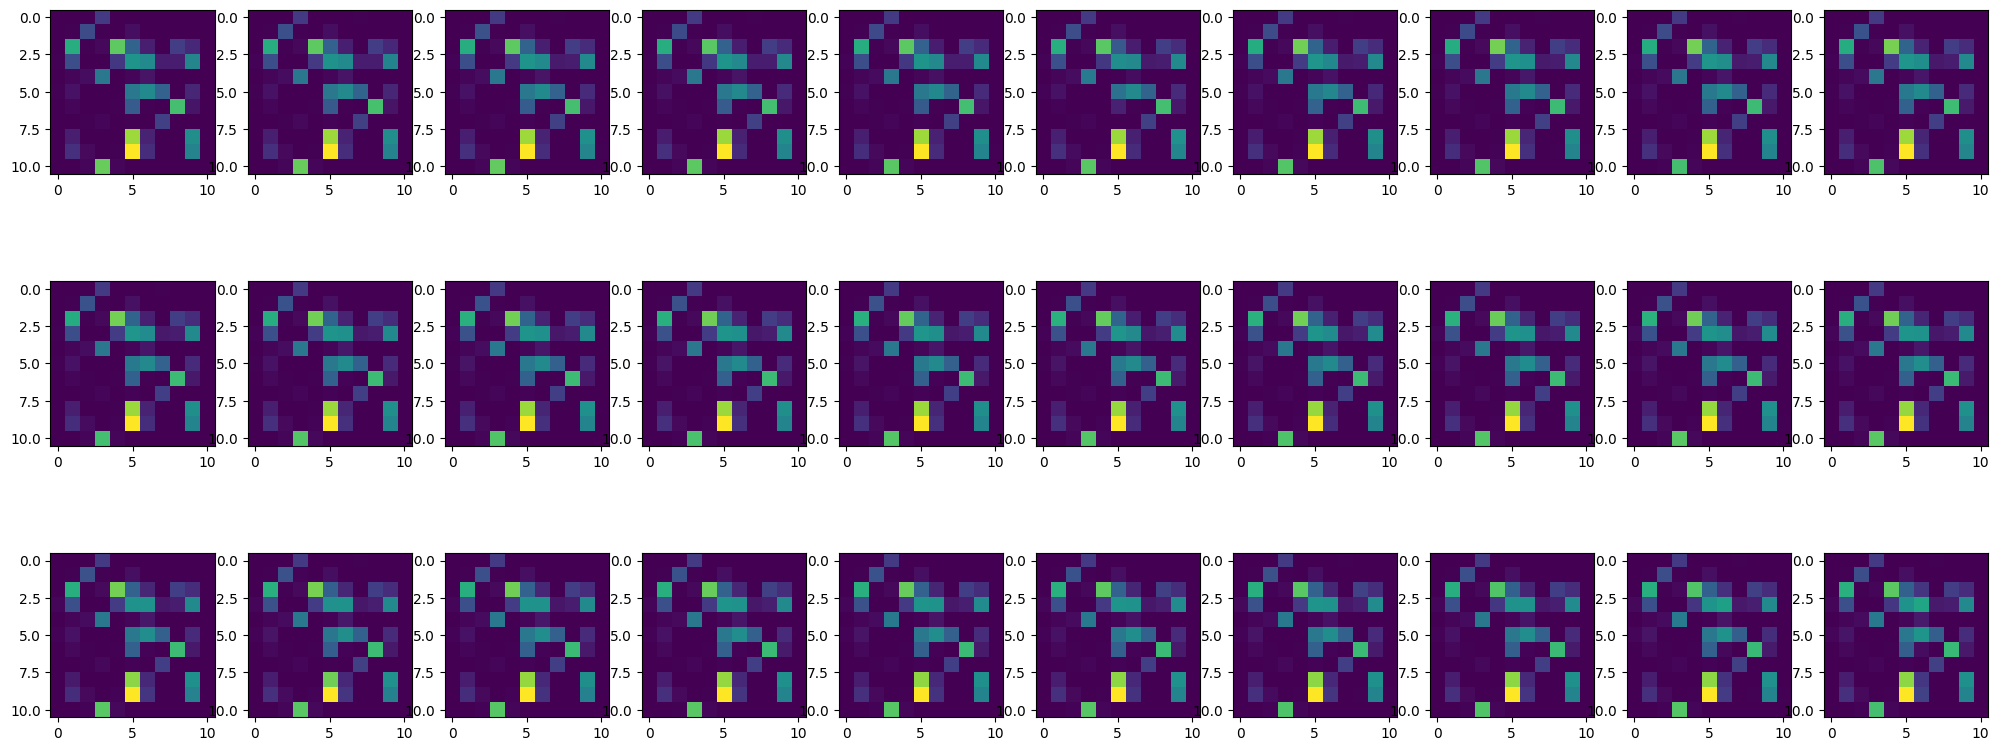

In [23]:

buffers2 = buffers
max_col = 32
max_row = 64
max_bytes = max_row * max_col
matrix = np.zeros((len(buffers2), max_row, max_col))

for i, buffer in enumerate(buffers2):
    pressure_sensor =buffer[2:2+max_bytes]
    matrix[i] = np.array(pressure_sensor).reshape(max_row, max_col)

df = pd.DataFrame(matrix.reshape(-1, 32).T)
df.to_csv("try23.csv")
plt.figure(figsize=(25, 10))
num_fig_col = 10
num_fig_row = len(matrix) // num_fig_col
p = 1
for i in range(0, num_fig_row):
    for j in range(0, num_fig_col):
        plt.subplot(num_fig_row, num_fig_col, p)
        plt.imshow(matrix[p-1, :11,:11].T)
        #plt.imshow(matrix[p-1, 1:12,:11].T)
        p += 1

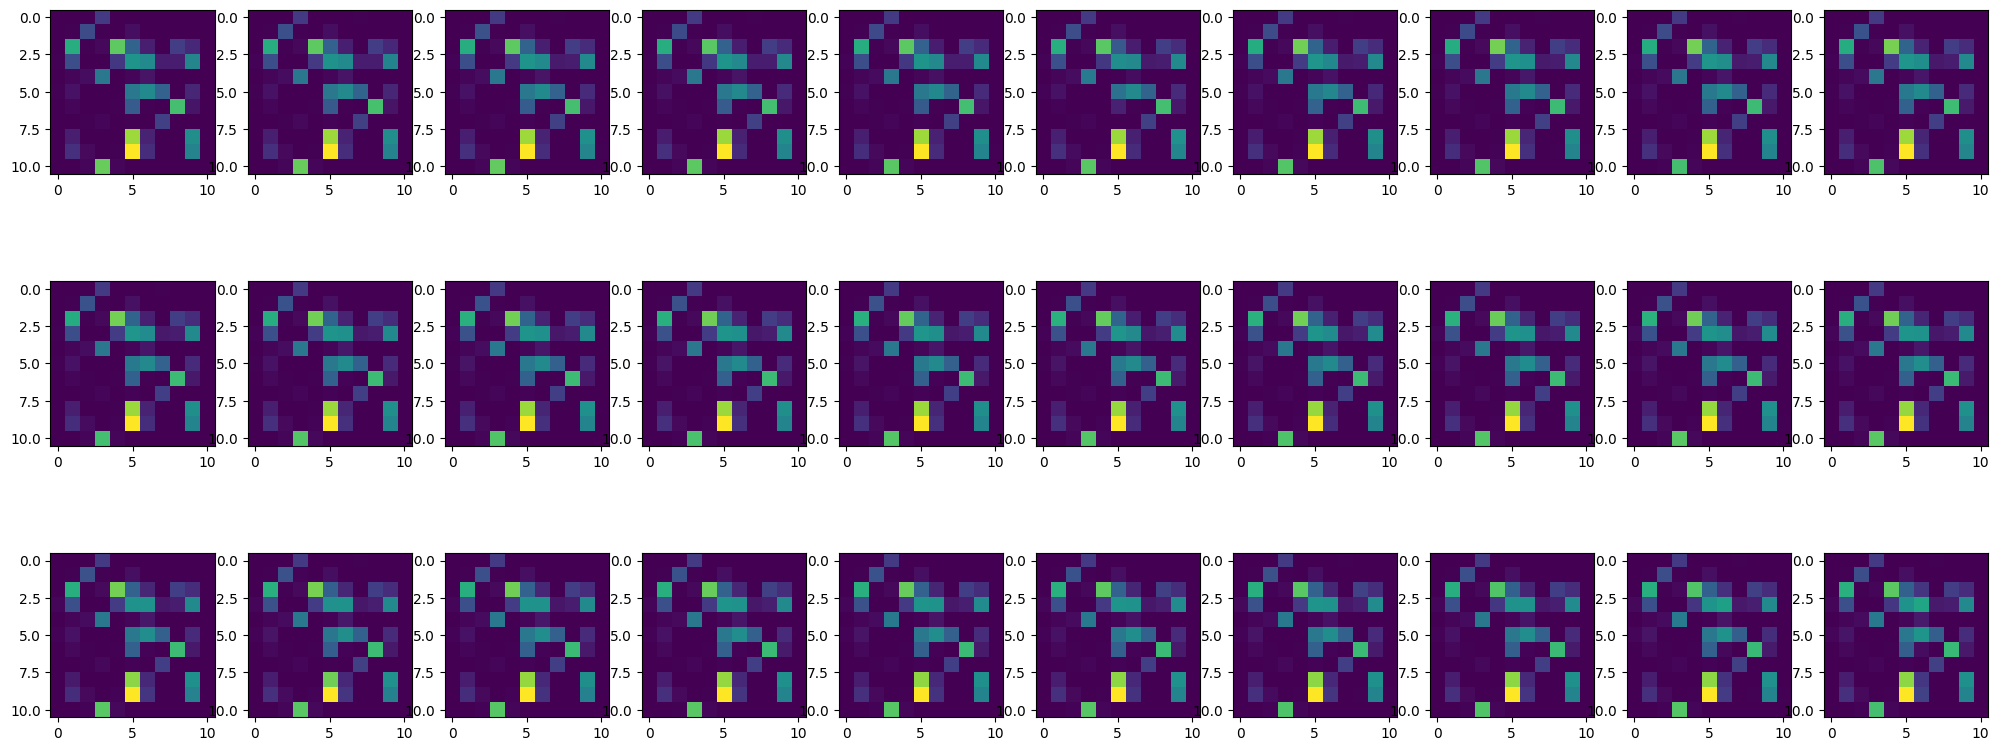

In [24]:

df = pd.DataFrame(matrix.reshape(-1, 32).T)
df.to_csv("try23.csv")
plt.figure(figsize=(25, 10))
num_fig_col = 10
num_fig_row = len(matrix) // num_fig_col
p = 1
for i in range(0, num_fig_row):
    for j in range(0, num_fig_col):
        plt.subplot(num_fig_row, num_fig_col, p)
        plt.imshow(matrix[p-1, :11,:11].T)
        #plt.imshow(matrix[p-1, 1:12,:11].T)
        p += 1

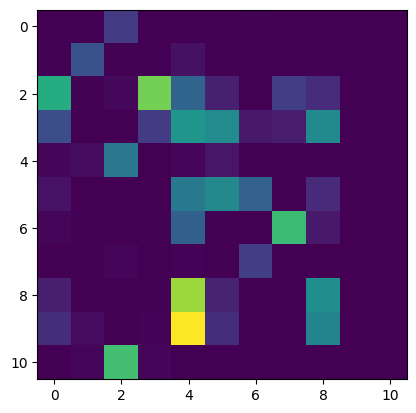

In [54]:
plt.imshow(matrix[10, 1:12,:11].T)

In [26]:
matrix[0, :11, :11]

array([[  741.,   716.,   756.,  1022.,   725.,  1004.,   688.,   704.,
          728.,   740.,   732.],
       [  745.,   886., 27879., 11218.,  1366.,  2741.,  1465.,   704.,
         4312.,  6508.,   756.],
       [  741., 10915.,   969.,   790.,  2172.,   768.,   819.,   905.,
          732.,  1718.,  1268.],
       [ 8094.,   991.,  1685.,   716., 18103.,   750.,   704.,  1446.,
          727.,   761., 34248.],
       [  728.,   710., 33480.,  7818.,   734.,   781.,   874.,   701.,
          807.,   951.,  1496.],
       [  731.,  2365., 14568., 23223.,  1284., 18135., 13155.,  1023.,
        37973., 44345.,   787.],
       [  741.,   727.,  4304., 21494.,  3027., 21332.,   906.,   712.,
         4824.,  6168.,   732.],
       [  855.,   798.,   746.,  4024.,   707., 14496.,   717.,  8992.,
          728.,   767.,   729.],
       [  743.,   694.,  8656.,  4075.,   723.,   749., 31504.,   704.,
          732.,   798.,   732.],
       [  737.,   770.,  5735., 20609.,   704.,  5456.,

In [31]:
import numpy as np

#matrix = np.random.rand(10,5)
#print(matrix.shape)
columns = matrix[0, :11, :11]
print(matrix.shape)
print(columns)

(30, 64, 32)
[[  741.   716.   756.  1022.   725.  1004.   688.   704.   728.   740.
    732.]
 [  745.   886. 27879. 11218.  1366.  2741.  1465.   704.  4312.  6508.
    756.]
 [  741. 10915.   969.   790.  2172.   768.   819.   905.   732.  1718.
   1268.]
 [ 8094.   991.  1685.   716. 18103.   750.   704.  1446.   727.   761.
  34248.]
 [  728.   710. 33480.  7818.   734.   781.   874.   701.   807.   951.
   1496.]
 [  731.  2365. 14568. 23223.  1284. 18135. 13155.  1023. 37973. 44345.
    787.]
 [  741.   727.  4304. 21494.  3027. 21332.   906.   712.  4824.  6168.
    732.]
 [  855.   798.   746.  4024.   707. 14496.   717.  8992.   728.   767.
    729.]
 [  743.   694.  8656.  4075.   723.   749. 31504.   704.   732.   798.
    732.]
 [  737.   770.  5735. 20609.   704.  5456.  3080.   728. 22252. 20205.
    726.]
 [  732.   727.   713.   704.   722.   745.   692.   706.   714.   813.
    715.]]


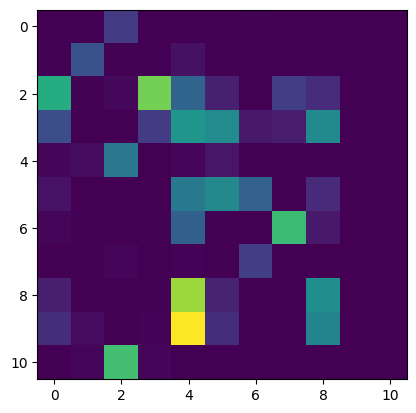

In [105]:
import numpy as np

offset = 0.05
scale = 0.01

calibrated_data11 = (matrix - offset) * scale

#plt.imshow(calibrated_data[1:11, :11])

plt.imshow(calibrated_data11[10, 1:12,:11].T)

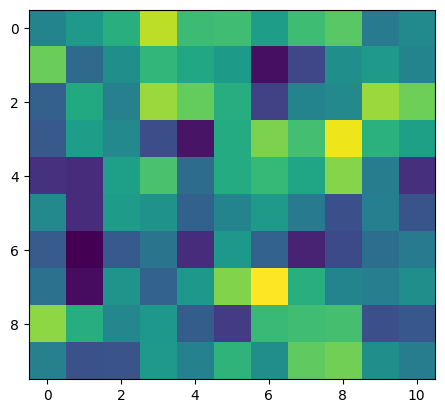

In [93]:
import numpy as np


# Select the columns for the sensor data and the standard data
sensor_data = matrix[:,:,30]
standard_data = matrix[:,:,31]

# Calculate the offset and gain
offset = np.mean(standard_data) - np.mean(sensor_data)
gain = np.mean(standard_data) / np.mean(sensor_data)

# Apply the offset and gain to the sensor data
calibrated_data3 = (sensor_data * gain) + offset

plt.imshow(calibrated_data3[1:11, :11])

AttributeError: 'numpy.ndarray' object has no attribute 'interpolate'

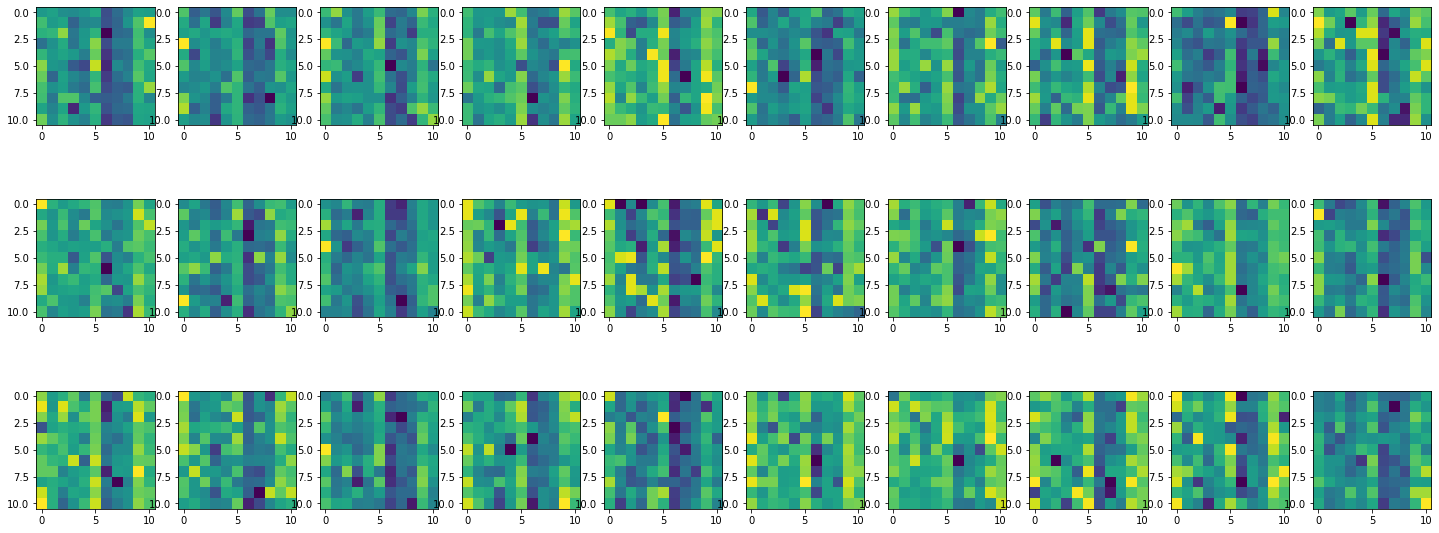

In [6]:
buffers1 = buffers
max_col = 32
max_row = 64
max_bytes = max_row * max_col
matrix = np.zeros((len(buffers1), max_row, max_col))

for i, buffer in enumerate(buffers1):
    pressure_sensor =buffer[2:2+max_bytes]
    matrix[i] = np.array(pressure_sensor).reshape(max_row, max_col)
plt.figure(figsize=(25, 10))
num_fig_col = 10
num_fig_row = len(matrix) // num_fig_col
p = 1
for i in range(0, num_fig_row):
    for j in range(0, num_fig_col):
        plt.subplot(num_fig_row, num_fig_col, p)
        plt.imshow(matrix[p-1, :11,:11])
        p += 1

In [53]:
df = pd.read_csv("balance_3.csv")

In [54]:
df = df.to_numpy()

In [55]:
df = df[:, 1:]
matrix = df.reshape(-1,64, 32)

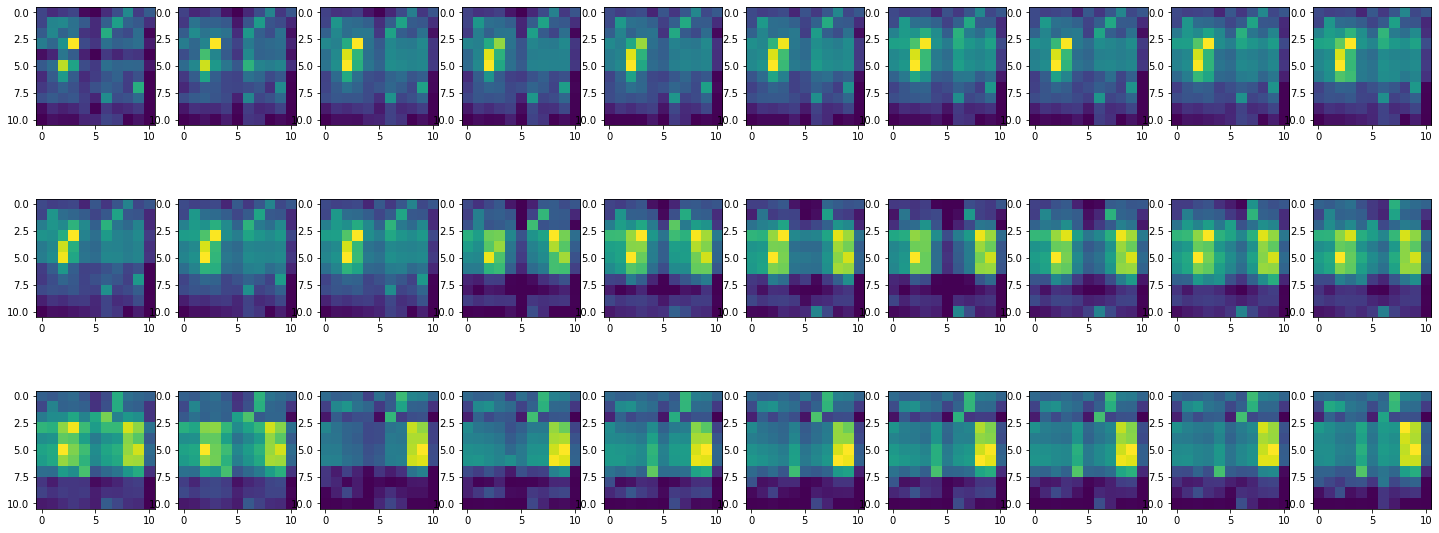

In [56]:
plt.figure(figsize=(25, 10))
num_fig_col = 10
num_fig_row = len(matrix) // num_fig_col
p = 1
for i in range(0, num_fig_row):
    for j in range(0, num_fig_col):
        plt.subplot(num_fig_row, num_fig_col, p)
        plt.imshow(matrix[p-1, :11,:11])
        p += 1

In [4]:
import serial
import serial.tools.list_ports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

baud_rate = 115200
mask_header = b'\xfa'
mask_tail = b'\xfe\xfe'
mask_serial_number = bytes(b'\x80\x00')

In [5]:
def int_from_bytes(xbytes: bytes) -> int:
    temp = bytearray(xbytes)
    temp.reverse()
    temp = int.from_bytes(temp, byteorder="big", signed=False)
    return temp

def bitwise_and_bytes(a, b):
    result_int = int.from_bytes(a, byteorder="big") & int.from_bytes(b, byteorder="big")
    return result_int.to_bytes(max(len(a), len(b)), byteorder="big")

def open_serial_port(port_number, baud_rate):
    ser = serial.Serial(port_number, baud_rate)
    serial_port.flushInput()

while True:
    try:
        ser_bytes = serial_port.readline()
        decoded_bytes = float(ser_bytes[0:len(ser_bytes)-2].decode("utf-8"))
        print(decoded_bytes)
    except:
        print("Keyboard Interrupt")
        break


Keyboard Interrupt
